# Initial data exploration

This notebook endeavours to answer the following investigate questions in order to inform that direction of the subsequent analysis:
* What are the general statistics of the data?
* How many products, product categories and shops are there and how common are they in the data?
* How many products are assigned to each product category?
* How many product types are sold at each shop?
* What is the overall trend of sales across all shops since 2018?
* What is the effect of price on sales?
* What is the effect of day of week/holidays on sales?
* What is the effect of day of month on sales?
* What is the effect of month of year on sales?
* Are all products sold at all shops?
* Were product categories allocated based on price?
* Are the sales dynamics of every shop unique?
* Are all products still being sold?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### What are the general statistics of the data?

In [2]:
#Import data
def create_main_df(sales_path: str, items_path: str) -> pd.DataFrame:
    """
    Create the main dataframe containing data to explore.
    """
    #Load csv with sales data
    df_sales = pd.read_csv(sales_path)
    #Load cvs with product category data
    df_items = pd.read_csv(items_path)
    #Merge
    df = pd.merge(df_sales, df_items, on='item_id')
    
    return df, df_items

# sales_path = 'historic_sales_data.csv'
# items_path = 'items.csv'
# df, df_items = create_main_df(sales_path, items_path)
# df.head()

In [3]:
def basic_info(df: pd.DataFrame) -> None:
    """
    Compile output describing the basic statistics of the sales data.
    """    
    print('---------------------------------------------')
    print('---------------------------------------------')
    print('What are the general statistics of the data?')
    print('---------------------------------------------')
    print('---------------------------------------------')
    print('\n \n')
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print('\n \n')
    print("----------INFO-----------------")
    print(df.info())
    print('\n \n')
    print("----------DESCRIPTION-------------")
    print(df.describe())
    print('\n \n')
    print("----------COLUMNS--------------")
    print(df.columns)
    print('\n \n')
    print("-------MISSING VALUES----------")
    print(df.isnull().sum())
    print('\n \n')
    print("-------NULL VALUES-------------")
    print(df.isna().sum())
    print('\n \n')
    print("-----SHAPE-------------")
    print(df.shape)

# basic_info(df)

### How many products, product categories and shops are there and how common are they in the data?

In [4]:
def product_cat_shop_info(df: pd.DataFrame) -> None:
    """
    Determine how many products, categories and shops there are and how often they occur.
    """
    print('\n \n')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('How many products, product categories and shops are there and how common are they in the data?')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print(f"Total number of products in the data: {df['item_id'].nunique()}")
    print(f"Total number of product categories in the data: {df['item_category_id'].nunique()}")
    print(f"Total number of shops in the data: {df['shop_id'].nunique()}")
    print('\n')
    print('The same distribution described the product, category and shop frequencies, this may be seen below.')
    df_plot = pd.DataFrame(data=df['item_id'].value_counts().tolist(), columns=['product_cat_shop_freq'])
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_plot)
    plt.title('Frequencies across all shops')
    plt.xlabel('Index')
    plt.ylabel('Frequency')
    plt.show()   
    
# product_cat_shop_info(df)

### How many products are assigned to each product category?

In [5]:
def product_cat_info(df_func: pd.DataFrame) -> None:
    """
    Determine how many products belong to each product category.
    """
    print('\n \n')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('How many products are assigned to each product category?')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    df_plot = df_func['item_category_id'].value_counts().reset_index().rename(columns={'index': 'Category', 'item_category_id': 'Num_prods'})
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_plot, x='Category', y='Num_prods')
    plt.title('Product frequencies across product categories')
    plt.show()   
# product_cat_info(df_items)

### How many product categories are sold at each shop?

In [6]:
def product_shop_info(df: pd.DataFrame) -> None:
    """
    Determine how many product categories are sold at each shop.
    """
    print('\n \n')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('How many product types are sold at each shop?')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    print('From the distribution we can clear see that not all products/product categories are sold at each shop.')

    df_plot = df.groupby(by=['shop_id']).agg({'item_category_id':'nunique'}).rename(columns={'item_category_id': 'Num_categories'})
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_plot, x='shop_id', y='Num_categories')
    plt.title('Product category frequencies wrt each shop')
    plt.show()   
    
# product_shop_info(df)

### What is the overall trend of sales across all shops since 2018?

In [7]:
#create df_dates
def create_dates_df() -> pd.DataFrame:
    """
    Plot the sales data as a time series. This plot is aggregated across all shops and products.
    """
    #Create holidays
    holidays = [[1,1], [21, 3], [30, 3], [2, 4], [27, 4], [1, 5], [16, 6], [9, 8], [24, 9], [16, 12], [17, 12], [25, 12], [26, 12]]
    hols = []
    for year in [2018, 2019, 2020]:
        for dat in holidays:
            hols.append(datetime(year, dat[1], dat[0]))    
    df_holidates = pd.DataFrame({'date': hols, 'date_type': 3})

    #create start and end dates
    date_start = datetime(2018, 1, 1)
    date_end = datetime(2020, 5, 31)

    #create date range
    days = pd.date_range(date_start, date_end, freq='D')

    #Create dataframe
    df_dates = pd.DataFrame({'date': days})
    # df_dates = df_dates.set_index('date')

    #add holiday metric
    df_dates = df_dates.merge(df_holidates, on='date', how='left').fillna(0)

    # add weekend metric
    df_dates["date_type"] = df_dates.apply(lambda row: 1 if row['date'].day_name() in ['Saturday'] else (2 if row['date'].day_name() in ['Sunday'] else row['date_type']), axis=1)
    
    return df_dates

# df_dates = create_dates_df()

In [8]:
#Prepare the sales data
def prepare_sales_data(df_func: pd.DataFrame, df_dates_func: pd.DataFrame) -> pd.DataFrame:
    #Add datetime
    df_func['date'] = pd.to_datetime(df_func[['year', 'month', 'day']])
    
    #extract relevant data
    df_func = df_func[['date', 'item_cnt_day']]

    #merge in dates
    df_func = pd.merge(df_dates_func, df_func, on='date', how='outer').fillna(0)

    #aggregate sales per day
    df_func = df_func.groupby(by='date').agg({'item_cnt_day':'sum'})
    # df_plot[df_plot['item_cnt_day']> 10]

    #set frequency of time series
    df_func = df_func.asfreq(freq= '1D')

    #sort the values
    df_func = df_func.sort_index(ascending=True)
    
    return df_func
# df_sales = prepare_sales_data(df, df_dates)

In [9]:
#Plot the sales data
def plot_sales_data(df_func: pd.DataFrame) -> None:
    print('\n \n')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('What is the overall trend of sales across all shops since 2018?')
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')

    #Let's plot it
    f, ax = plt.subplots(1,1)
    ax.plot(df_func['item_cnt_day'])

    #add title
    ax.set_title('Time series of sales data across all shops and products')

    #rotate x lables
    ax.tick_params(axis = 'x', rotation = 45)

    #show graph
    plt.show()
    plt.close()
    
# plot_sales_data(df_sales)

### What is the effect of price on sales?

In [10]:
def price_sale_relationship(df_func: pd.DataFrame) -> None:
    """
    Illustrate the relationship between price and sales
    """
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('What is the effect of price on sales?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    df_plot = df_func[['item_category_id', 'item_price']].value_counts().reset_index()
    df_plot.columns = ['item_category_id', 'item_price', 'count']
    #remove outlier
    df_plot = df_plot.drop(df_plot[df_plot['item_price'] > 90000].index)
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_plot, x='item_price', y='count', hue='item_category_id')
    plt.title('Relationship between sales and price of product')
    plt.show() 
    
# price_sale_relationship(df)

### What is the effect of day of week/holidays on sales?

In [11]:
#check affect of holidays, Saturdays and Sundays on overall sales
def sales_daytype_relationship(df_func: pd.DataFrame, df_dates_func: pd.DataFrame) -> None:
    """
    """
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('What is the effect of day type on sales?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    
    #extract relevant data
    df_plot = df_func[['date', 'item_cnt_day']]
    #merge in dates
    df_plot = pd.merge(df_dates_func, df_plot, on='date', how='outer').fillna(0)
    #aggregate sales per day
    df_plot = df_plot.groupby(by=['date', 'date_type']).agg({'item_cnt_day':'sum'})
    #Create palette for plot
    palette = {0:"tab:cyan",
               1:"tab:orange", 
               2:"tab:purple",
               3:"tab:red"}
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df_plot, 
                 x='date', 
                 y='item_cnt_day', 
                 hue='date_type', 
                 palette=palette, 
                 marker='o',
                legend=False)
    plt.title('Relationship between sales and day type')
    #Edit legend
    custom_legend_labels = ['Week', 'Sat', 'Sun', 'Hol']
    plt.legend(title='Day', loc='upper left', labels=custom_legend_labels)
    plt.show() 
    
# sales_daytype_relationship(df)

### What is the effect of day of month on sales?

In [12]:
#check affect of day of month on overall sales
def sales_day_of_month_relationship(df_func: pd.DataFrame) -> None:
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('What is the effect of day of month on sales?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    plt.figure(figsize=(8, 4))
    sns.displot(df_func['day'])
    plt.title('Relationship between sales and day of month')
    plt.show() 
    
# sales_day_of_month_relationship(df)

### What is the effect of month of year on sales?

In [13]:
#check month of year on overall sales
def sales_month_of_year_relationship(df_func: pd.DataFrame) -> None:
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('What is the effect of month of year on sales?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    print('Everything looks sensible. We can also notice that there are clear indications of a trend wrt the months around the end of the year having high sales and the numbers gradually decreasing until we hit month 12 again')
    plt.figure(figsize=(8, 4))
    sns.displot(df_func['month'])
    plt.title('Relationship between sales and month of year')
    plt.show() 
    
# sales_month_of_year_relationship(df)

### Were product categories allocated based on price?

In [14]:
def prod_cats_price_relationship(df_func: pd.DataFrame) -> None:
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('Were product categories allocated based on price?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Consider the distribution below in answer to this question.')
    print('The plot makes it clear that item categories were not assigned by price.')
    df_func = df_func.drop(df_func[df_func['item_price'] > 90000].index)
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_func, x='item_category_id', y='item_price')
    plt.title('Price to product category boxplots')
    plt.show() 
# prod_cats_price_relationship(df)

### Are the sales dynamics of every shop unique?

In [15]:
def shop_sale_dynamics(df_func: pd.DataFrame, df_dates_func) -> None:
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('Are the sales dynamics of every shop unique?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    print('Below I have plotted the distribution of sales for 10 shops.')
    print('The plots make it clear that the sales dynamics of each shop is indeed unique.')
    
    unique_shops = df_func['shop_id'].unique()
    palette = {0:"tab:cyan",
               1:"tab:orange", 
               2:"tab:purple",
               3:"tab:red"}
    for i, cat in enumerate(unique_shops[:10]):
        #Extract product category data
        df_plot = df_func[['date', 'item_cnt_day', 'shop_id']]
        df_plot = df_plot[df_plot['shop_id'] == cat].drop('shop_id', axis=1)
        #Merge in all dates
        df_plot = pd.merge(df_dates_func, df_plot, on='date', how='left').fillna(0)    
        #Aggregate sales per day per group
        df_plot = df_plot.groupby(by=['date', 'date_type']).agg({'item_cnt_day':'sum'})
        plt.figure(i)
        #Create plot
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=df_plot, 
                     x='date', 
                     y='item_cnt_day', 
                     hue='date_type', 
                     palette=palette, 
                     marker='o',
                    legend=False)
        plt.title('Illustrating sales dynamics for each shop')
        #Edit legend
        custom_legend_labels = ['Week', 'Sat', 'Sun', 'Hol']
        plt.legend(title='Day', loc='upper left', labels=custom_legend_labels)
        plt.show() 
    
    
    
# shop_sale_dynamics(df, df_dates)

### Are all products still being sold?

In [16]:
#limit the data set to products that sold in 2020
def find_products_no_longer_sold(df_func: pd.DataFrame, date_limit: datetime) -> None:
    """
    """   
    print('\n \n')
    print('---------------------------------------')
    print('---------------------------------------')
    print('Are all products still being sold?')
    print('---------------------------------------')
    print('---------------------------------------')
    print('\n')
    #total products
    prods_total = len(df_func['item_id'].unique())
    #Identify products still sold
    prods_sold_2020 = len(df_func[df_func['date']>= date_limit]['item_id'].unique())
    print(f'There are a total of {prods_total} products in the dataset, but only {prods_sold_2020} have been sold in 2020.')
    print(f'This clearly illustrates that a total of {prods_total - prods_sold_2020} have not been sold in the past 5 months')

# find_products_no_longer_sold(df, datetime(2020, 1, 1))

---------------------------------------------
---------------------------------------------
What are the general statistics of the data?
---------------------------------------------
---------------------------------------------

 

----------TOP 5 RECORDS--------
   day  month  year  shop_id  item_id  item_price  item_cnt_day  \
0   22     11  2018       52  1003734        1300             1   
1   24     11  2018       52  1003734        1300             1   
2   28     11  2018       52  1003734        1300             1   
3    1     11  2018       52  1003734        1300             1   
4    2     11  2018       52  1003734        1300             1   

   item_category_id  
0                46  
1                46  
2                46  
3                46  
4                46  

 

----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664552 entries, 0 to 2664551
Data columns (total 8 columns):
 #   Column            Dtype
---  ------            

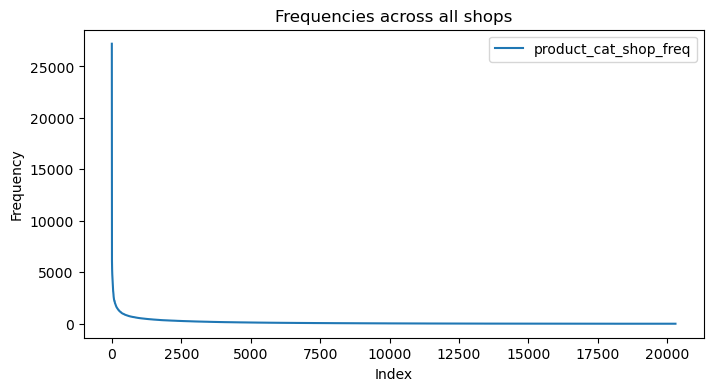


 

----------------------------------------------------------------
----------------------------------------------------------------
How many products are assigned to each product category?
----------------------------------------------------------------
----------------------------------------------------------------


Consider the distribution below in answer to this question.


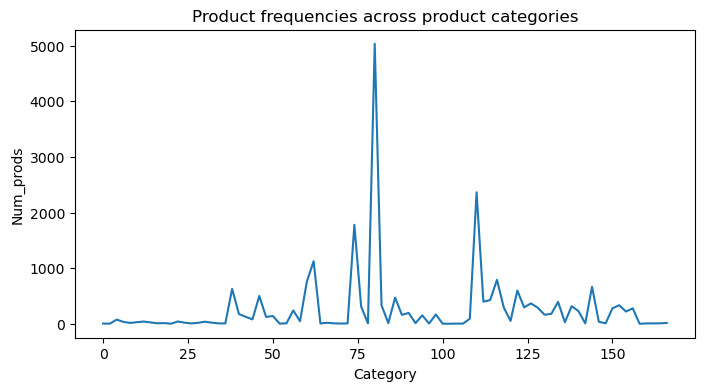


 

----------------------------------------------------------------
----------------------------------------------------------------
How many product types are sold at each shop?
----------------------------------------------------------------
----------------------------------------------------------------


Consider the distribution below in answer to this question.
From the distribution we can clear see that not all products/product categories are sold at each shop.


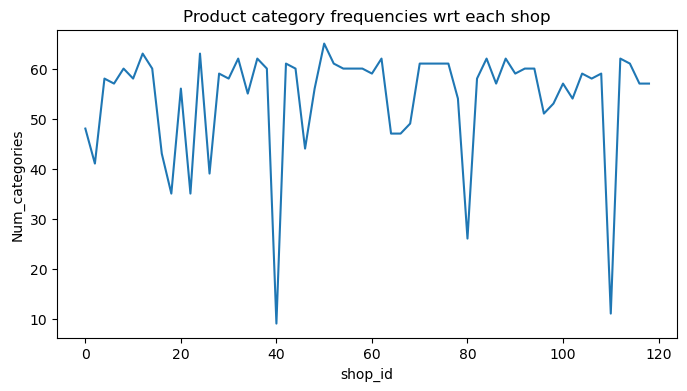


 

----------------------------------------------------------------
----------------------------------------------------------------
What is the overall trend of sales across all shops since 2018?
----------------------------------------------------------------
----------------------------------------------------------------


Consider the distribution below in answer to this question.


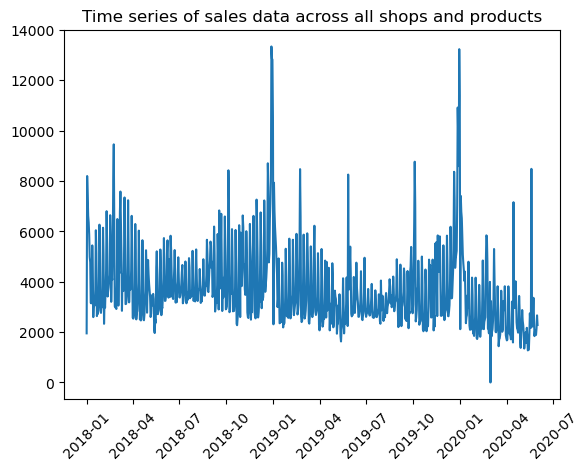


 

---------------------------------------
---------------------------------------
What is the effect of price on sales?
---------------------------------------
---------------------------------------


Consider the distribution below in answer to this question.


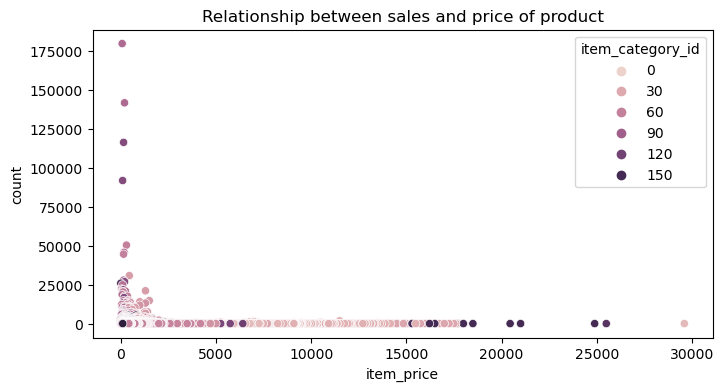


 

---------------------------------------
---------------------------------------
What is the effect of day type on sales?
---------------------------------------
---------------------------------------


Consider the distribution below in answer to this question.


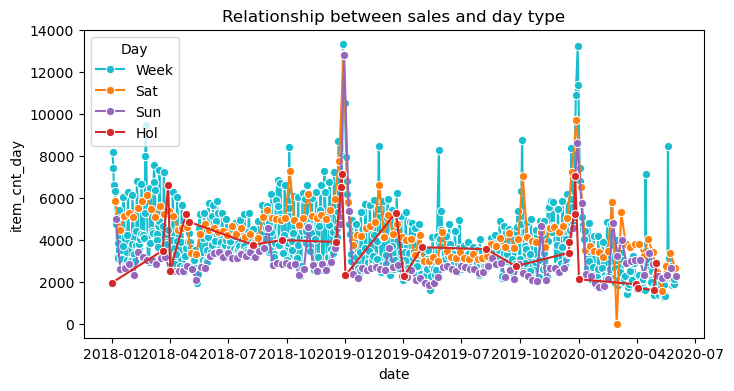


 

---------------------------------------
---------------------------------------
What is the effect of day of month on sales?
---------------------------------------
---------------------------------------


Consider the distribution below in answer to this question.


<Figure size 800x400 with 0 Axes>

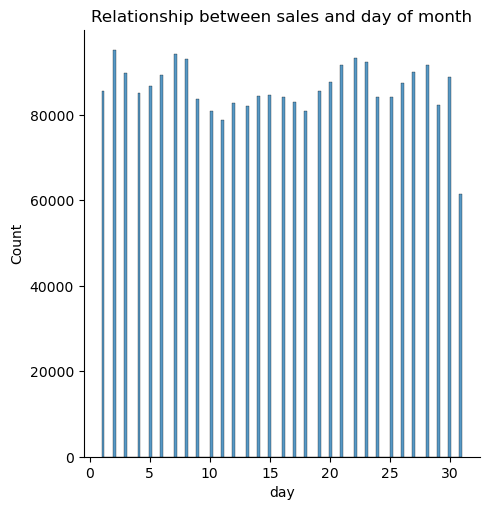


 

---------------------------------------
---------------------------------------
What is the effect of month of year on sales?
---------------------------------------
---------------------------------------


Consider the distribution below in answer to this question.
Everything looks sensible. We can also notice that there are clear indications of a trend wrt the months around the end of the year having high sales and the numbers gradually decreasing until we hit month 12 again


<Figure size 800x400 with 0 Axes>

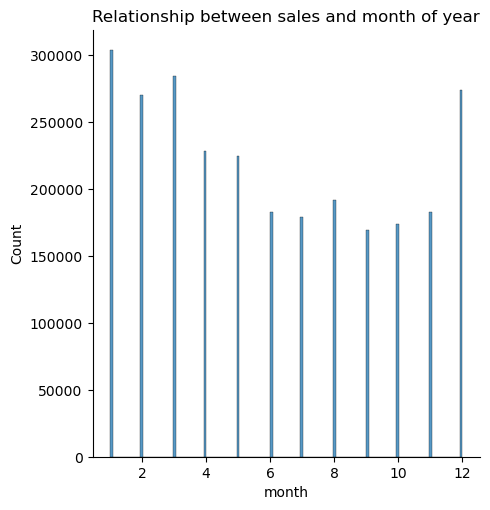


 

---------------------------------------
---------------------------------------
Were product categories allocated based on price?
---------------------------------------
---------------------------------------


Consider the distribution below in answer to this question.
The plot makes it clear that item categories were not assigned by price.


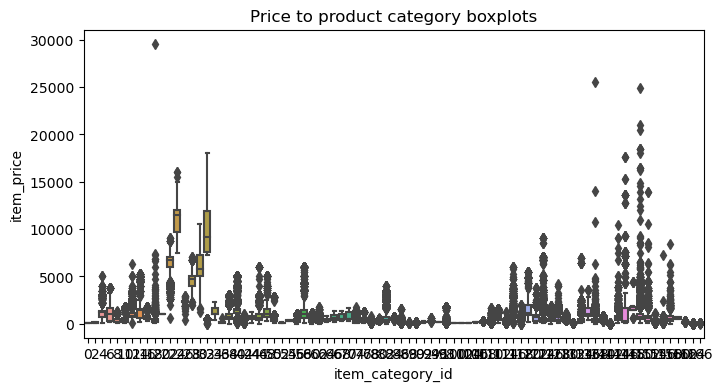


 

---------------------------------------
---------------------------------------
Are the sales dynamics of every shop unique?
---------------------------------------
---------------------------------------


Below I have plotted the distribution of sales for 10 shops.
The plots make it clear that the sales dynamics of each shop is indeed unique.


<Figure size 640x480 with 0 Axes>

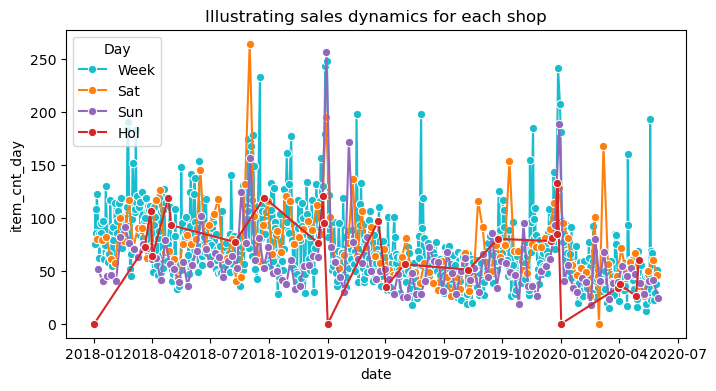

<Figure size 640x480 with 0 Axes>

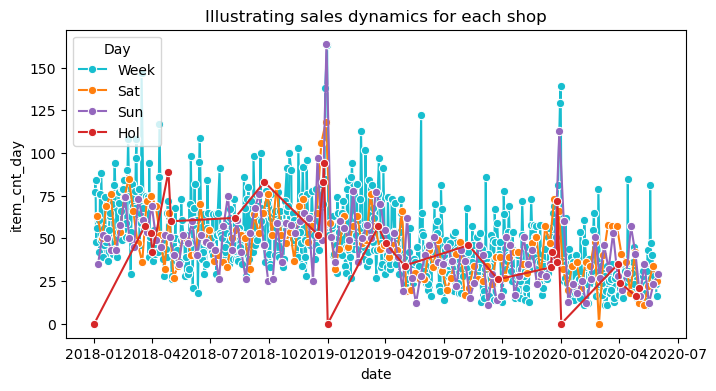

<Figure size 640x480 with 0 Axes>

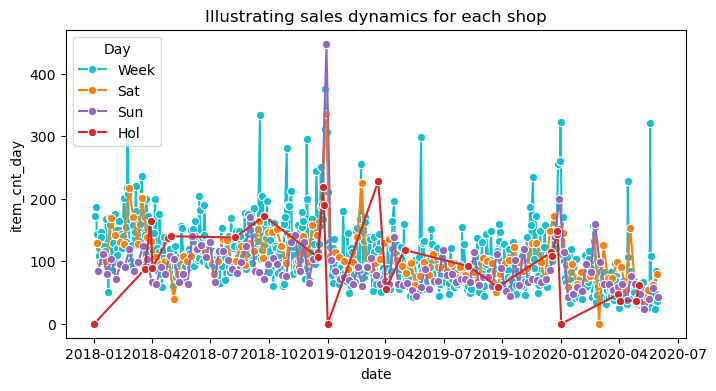

<Figure size 640x480 with 0 Axes>

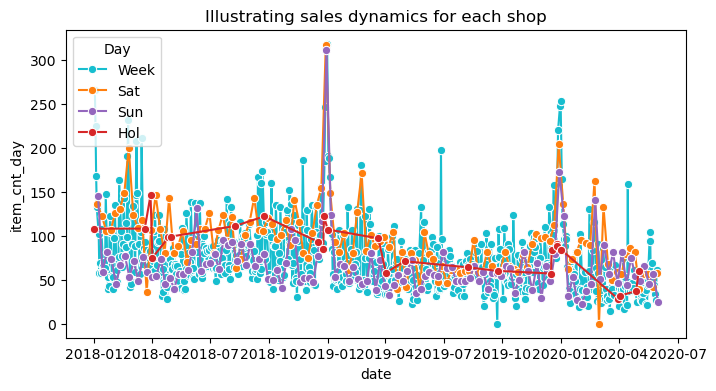

<Figure size 640x480 with 0 Axes>

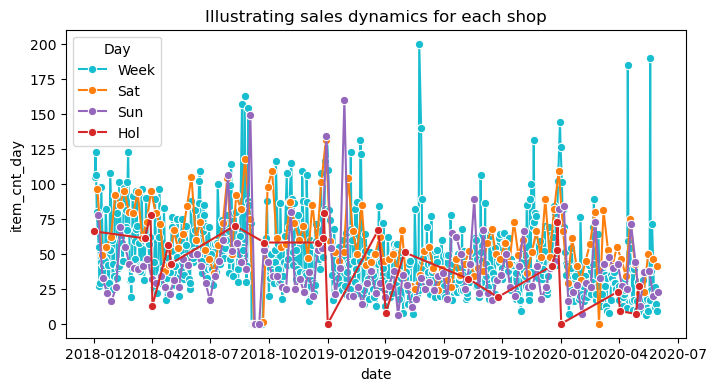

<Figure size 640x480 with 0 Axes>

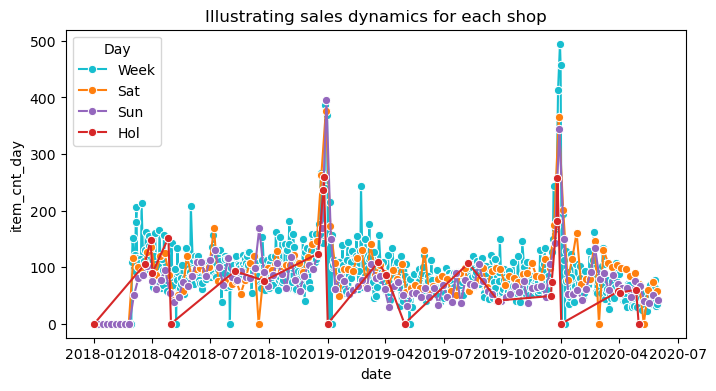

<Figure size 640x480 with 0 Axes>

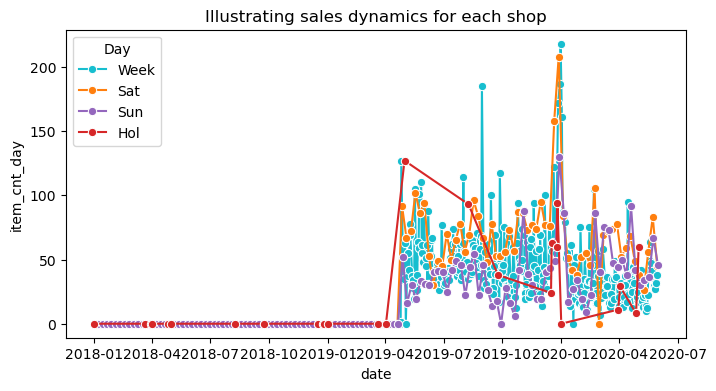

<Figure size 640x480 with 0 Axes>

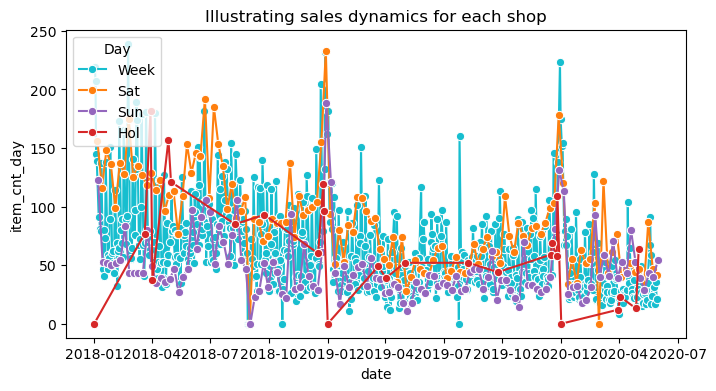

<Figure size 640x480 with 0 Axes>

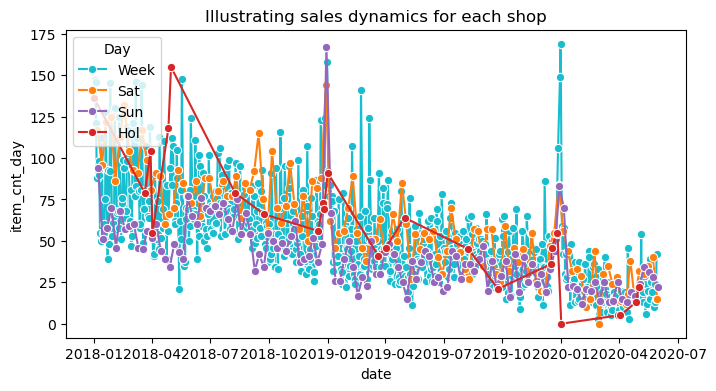

<Figure size 640x480 with 0 Axes>

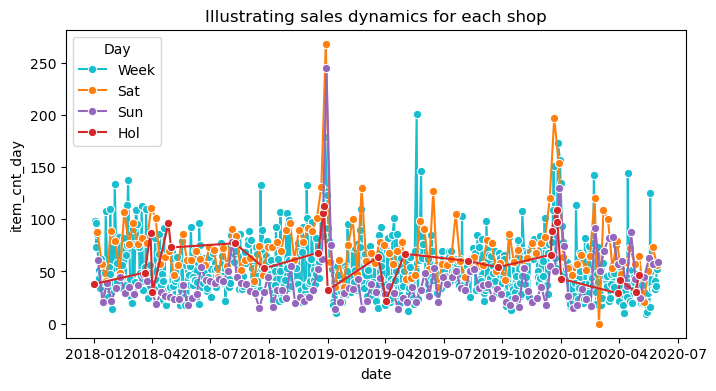


 

---------------------------------------
---------------------------------------
Are all products still being sold?
---------------------------------------
---------------------------------------


There are a total of 20292 products in the dataset, but only 9229 have been sold in 2020.
This clearly illustrates that a total of 11063 have not been sold in the past 5 months
 
 
-------------------------------------------
-------------------------------------------


In [17]:
#run notebook
def main():
    """
    Main executable that governs the execution of rest of notebook. 
    """
    #Create main dataframe
    sales_path = 'historic_sales_data.csv'
    items_path = 'items.csv'
    df, df_items = create_main_df(sales_path, items_path)
    
    #Basic statistics of data
    basic_info(df)
    
    #Product, category, shop info
    product_cat_shop_info(df)

    #Num prod in cats
    product_cat_info(df_items)
    
    #Num cats at shops
    product_shop_info(df)
    
    #Ovelall sales trend
    df_dates = create_dates_df()
    df_sales = prepare_sales_data(df, df_dates)    
    plot_sales_data(df_sales)
    
    #Price sale relationship
    price_sale_relationship(df)
    
    #Sales daytype relationship
    sales_daytype_relationship(df, df_dates)
    
    #Sales monthday rel
    sales_day_of_month_relationship(df)
    
    #Sales month of year relationship
    sales_month_of_year_relationship(df)
    
    #Prod cats and price
    prod_cats_price_relationship(df)
    
    #Shop sale dynamics
    shop_sale_dynamics(df, df_dates)
    
    #Product sales
    find_products_no_longer_sold(df, datetime(2020, 1, 1))
    
    print(' ')
    print(' ')
    print('-------------------------------------------')
    print('-------------------------------------------')

main()